# ANN MODEL FOR DIABETES DATASET

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# loading the dataset

df=pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


EDA PART

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

DATA VISUALISATION

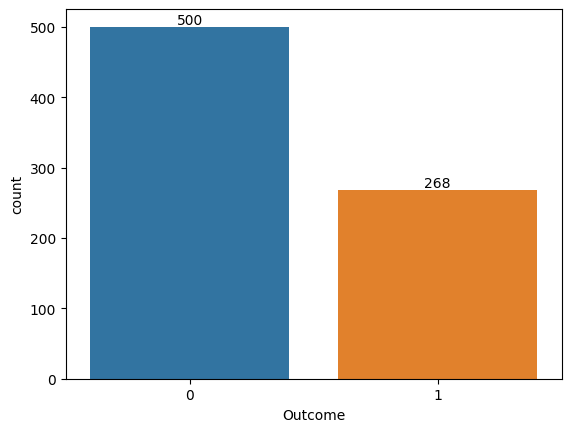

In [6]:
outcome=sns.countplot(x='Outcome',data=df)
for bars in outcome.containers:
    outcome.bar_label(bars)

MODEL BUILDING

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# classifying into dependent and independent variables 

x=df.iloc[:,0:8].values
y=df.iloc[:,8].values.reshape(-1,1)

In [9]:
# independent

x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
# dependent
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [11]:
print(x.shape)



(768, 8)


In [12]:
print(y.shape)

(768, 1)


In [13]:
# splitting model into training and testing part

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
print(x_train.shape)
print(y_train.shape)

(614, 8)
(614, 1)


In [15]:
print(x_test.shape)
print(y_test.shape)

(154, 8)
(154, 1)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
kerasmodel=Sequential()

In [18]:
# defining the keras model layer by layer

kerasmodel.add(Dense(120,input_dim=8,activation='relu'))
kerasmodel.add(Dense(80,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [19]:
# compiling the keras model

kerasmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
# fitting model

kerasmodel.fit(x_train,y_train,epochs=150,batch_size=700)

Epoch 1/150
1/1 [==============================] - 1s 637ms/step - loss: 3.8398 - accuracy: 0.6303
Epoch 2/150
1/1 [==============================] - 0s 16ms/step - loss: 3.6142 - accuracy: 0.5212
Epoch 3/150
1/1 [==============================] - 0s 0s/step - loss: 3.1563 - accuracy: 0.4984
Epoch 4/150
1/1 [==============================] - 0s 16ms/step - loss: 2.1977 - accuracy: 0.4593
Epoch 5/150
1/1 [==============================] - 0s 16ms/step - loss: 1.6393 - accuracy: 0.4609
Epoch 6/150
1/1 [==============================] - 0s 0s/step - loss: 1.7941 - accuracy: 0.5244
Epoch 7/150
1/1 [==============================] - 0s 16ms/step - loss: 1.9776 - accuracy: 0.5147
Epoch 8/150
1/1 [==============================] - 0s 17ms/step - loss: 1.9650 - accuracy: 0.5049
Epoch 9/150
1/1 [==============================] - 0s 0s/step - loss: 1.7041 - accuracy: 0.5081
Epoch 10/150
1/1 [==============================] - 0s 16ms/step - loss: 1.2707 - accuracy: 0.5472
Epoch 11/150
1/1 [======

In [21]:
# checking the training accuracy

_,accuracy=kerasmodel.evaluate(x_train,y_train)
print("train accuracy:",accuracy*100)

20/20 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7932
train accuracy: 79.31596040725708
